# <code style='background:yellow;color:black;font-family:Roboto'>CAR PRICE PREDICTION</code>

## Importing Neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading and Preprocessing

In [7]:
df = pd.read_csv('car data.csv')

#### Basic Info

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Checking for NULL values

In [10]:
df.isnull().sum().sum()

0

#### Checking and Removing for Duplicate Values

In [11]:
df.duplicated().sum()

2

In [13]:
# Check for duplicates and create a new column "Is_Duplicate"
df['Is_Duplicate'] = df.duplicated()

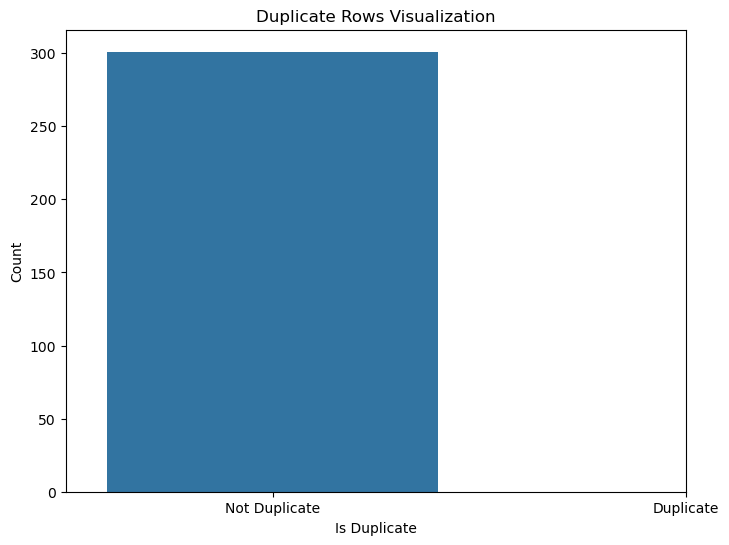

In [14]:
# Create a count plot to visualize duplicates
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Duplicate', data=df)
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.title('Duplicate Rows Visualization')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])  # Customize x-axis labels
plt.show()

In [15]:
# Drop the "Is_Duplicate" column if not needed
df.drop(columns=['Is_Duplicate'], inplace=True)

In [17]:
df = df.drop_duplicates(subset=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])

In [18]:
df.duplicated().sum()

0

## Data Visualization

### 1) Correlation Matrix

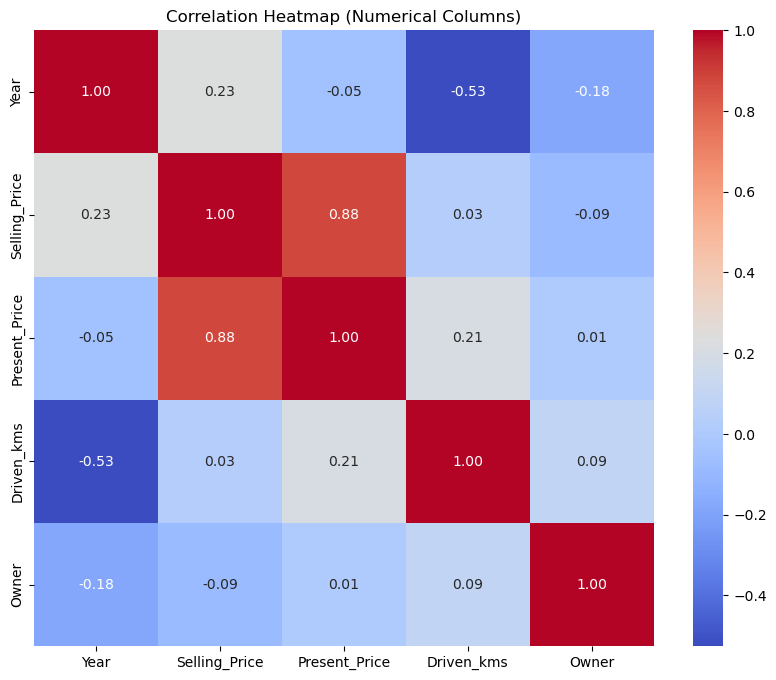

In [21]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

### 2) Histogram

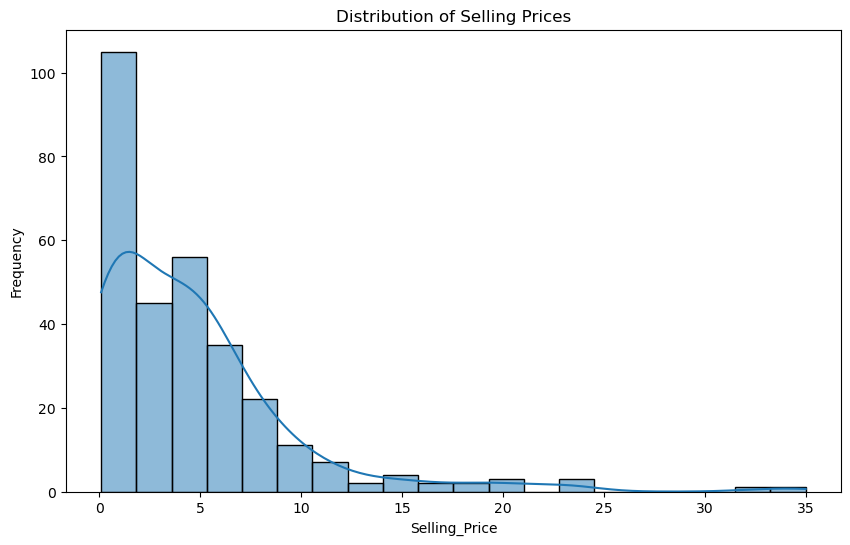

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

## Data Encoding

In [28]:
# Checking the distribution of categorical data
print(df['Fuel_Type'].value_counts())
print('\n')
print(df['Selling_type'].value_counts())
print('\n')
print(df['Transmission'].value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64


Dealer        193
Individual    106
Name: Selling_type, dtype: int64


Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [29]:
# Encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [31]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


## Data Modeling

#### Splitting X and Y

In [35]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

#### Splitting training and testing dataset

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [ ]:
## Data Evaluation and

### 1.Linear Regression

In [37]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [38]:
Y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.41
R-squared (R2): 0.89


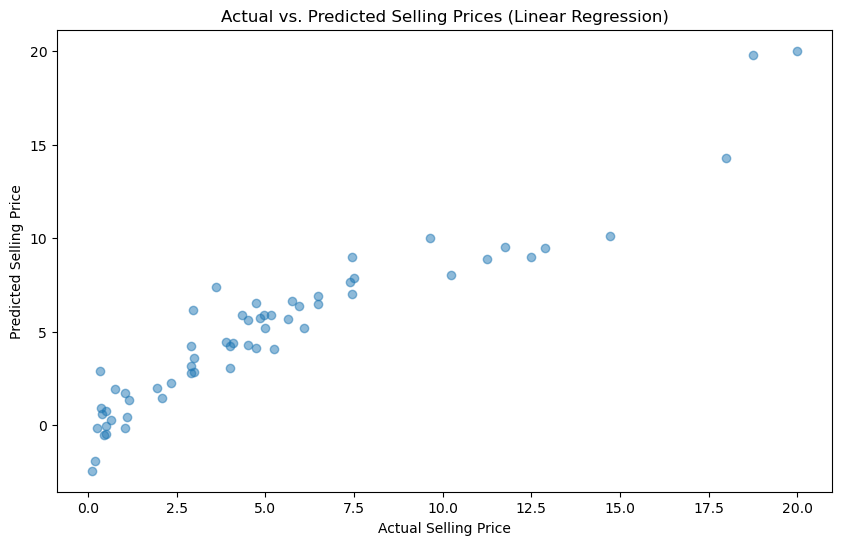

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

### 2. Random Forest Regression

In [41]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=17)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 1.42
Random Forest R-squared (R2): 0.94


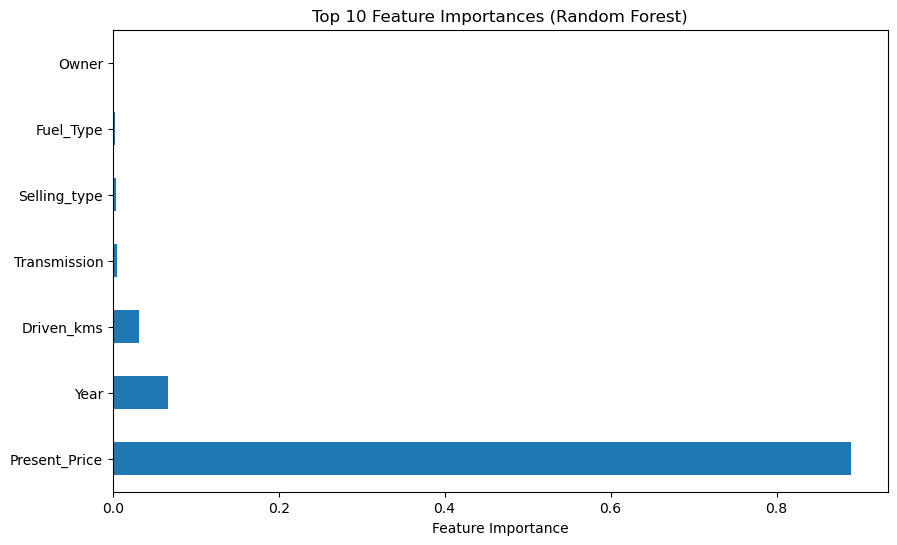

In [42]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()